In [57]:
from copy import copy
import os.path as osp
import pickle as pkl
import numpy as np

In [58]:
def load_citation_dataset(path:str,
                          dataset:str='cora'):

    # The last, load hypergraph.
    with open(osp.join(path, dataset, 'hypergraph.pickle'), 'rb') as f:
        # hypergraph in hyperGCN is in the form of a dictionary.
        # { hyperedge: [list of nodes in the he], ...}
        hypergraph = pkl.load(f)

    hyperedges = list(hypergraph.values())
    return hyperedges

In [59]:
edges = load_citation_dataset(path="./data/raw_data/coauthorship/", dataset="cora")
edges_size = [len(e) for e in edges]
edges = [x[0] for x in sorted(zip(edges, edges_size), key=lambda x:x[1], reverse=True)]


In [60]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

def subgraph(i):
    G = nx.Graph()
    for cnt, edge in enumerate(edges):
        if cnt == i:
            continue
        else:
            G.add_edges_from(list(combinations(edge,2)))
    S = nx.subgraph(G, edges[i])
    return S

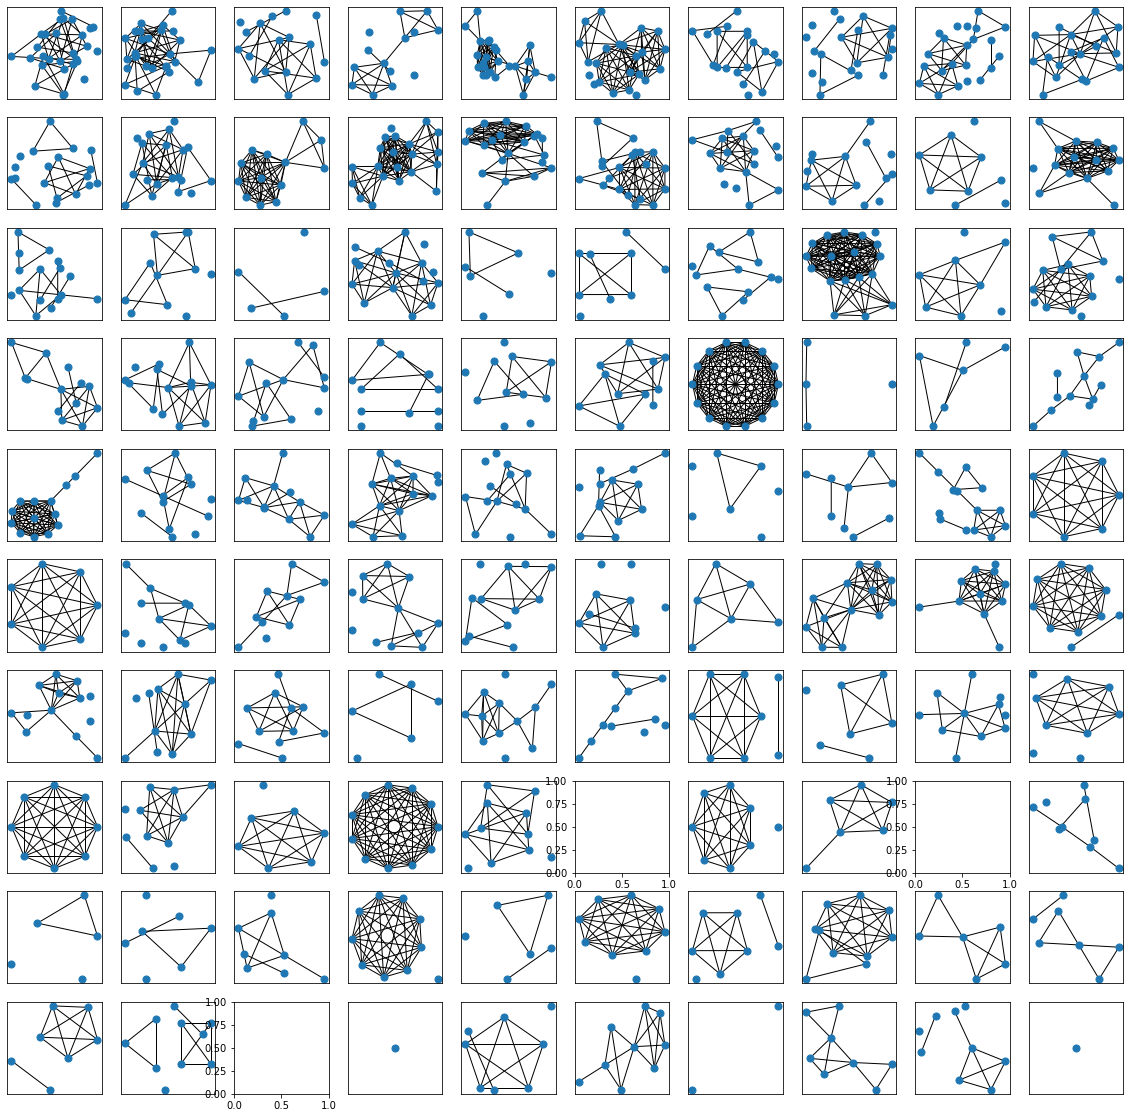

In [61]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
for i in range(100):
    r = i//10
    c = i%10
    ax = axs[r,c]
    S = subgraph(i)
    nx.draw(S, ax=ax, pos=nx.kamada_kawai_layout(S), node_size=50)
    ax.axis("on")
plt.savefig("edges_structure.pdf")
plt.show()
    